In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
filepath = os.getcwd() + '/datasets/'

读入CSV文件

In [3]:
dau = pd.read_csv(filepath + 'section4-dau.csv')
dau.head()

,log_date,app_name,user_id
0,2013-08-01,game-01,33754
1,2013-08-01,game-01,28598
2,2013-08-01,game-01,30306
3,2013-08-01,game-01,117
4,2013-08-01,game-01,6605


In [4]:
user_info = pd.read_csv(filepath + 'section4-user_info.csv')
user_info.head()

,install_date,app_name,user_id,gender,generation,device_type
0,2013-04-15,game-01,1,M,40,iOS
1,2013-04-15,game-01,2,M,10,Android
2,2013-04-15,game-01,3,F,40,iOS
3,2013-04-15,game-01,4,M,10,Android
4,2013-04-15,game-01,5,M,40,iOS


合并 DAU 和 User Info 的数据

In [5]:
#dau_user_info = pd.merge(dau, user_info, how='inner', on=['user_id', 'app_name'])
dau_user_info = dau.merge(user_info, how='inner', on=['user_id', 'app_name'])
dau_user_info.head()

,log_date,app_name,user_id,install_date,gender,generation,device_type
0,2013-08-01,game-01,33754,2013-08-01,M,20,iOS
1,2013-08-02,game-01,33754,2013-08-01,M,20,iOS
2,2013-08-01,game-01,28598,2013-07-16,M,50,iOS
3,2013-08-04,game-01,28598,2013-07-16,M,50,iOS
4,2013-08-12,game-01,28598,2013-07-16,M,50,iOS


用户群分析（按性别统计）

In [6]:
## 增加一列表示月份
dau_user_info['log_month'] = dau_user_info['log_date'].apply(lambda x: x[:7])
pd.crosstab(dau_user_info['log_month'], dau_user_info['gender'])

gender,F,M
log_month,,
2013-08,47343,46842
2013-09,38027,38148


用户群分析（按年龄统计）

In [7]:
pd.crosstab(dau_user_info['log_month'], dau_user_info['generation'])

generation,10,20,30,40,50
log_month,,,,,
2013-08,18785,33671,28072,8828,4829
2013-09,15391,27229,22226,7494,3835


用户群分析（按性别 * 年龄统计）

In [8]:
pd.crosstab(dau_user_info['log_month'], [dau_user_info['gender'], dau_user_info['generation']])

gender         F                               M                          
generation    10     20     30    40    50    10     20     30    40    50
log_month                                                                 
2013-08     9091  17181  14217  4597  2257  9694  16490  13855  4231  2572
2013-09     7316  13616  11458  3856  1781  8075  13613  10768  3638  2054

用户群分析（按设备统计）

In [9]:
pd.crosstab(dau_user_info['log_month'], dau_user_info['device_type'])

device_type,Android,iOS
log_month,,
2013-08,46974,47211
2013-09,29647,46528


用户群分析结果可视化

In [10]:
## 按照日期和设备类型计算用户数
dau_user_info_device_summary = dau_user_info.groupby(['log_date', 'device_type'])['user_id'].count().rename('dau').reset_index()
dau_user_info_device_summary['log_date'] = pd.to_datetime(dau_user_info_device_summary['log_date'])
dau_user_info_device_summary.head()

,log_date,device_type,dau
0,2013-08-01,Android,1784
1,2013-08-01,iOS,1805
2,2013-08-02,Android,1386
3,2013-08-02,iOS,1451
4,2013-08-03,Android,1295


In [11]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-deep')
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

%matplotlib inline


In [12]:
x = dau_user_info_device_summary.drop_duplicates(subset='log_date')['log_date']
y1 = dau_user_info_device_summary.loc[dau_user_info_device_summary['device_type'] == 'Android', 'dau']
y2 = dau_user_info_device_summary.loc[dau_user_info_device_summary['device_type'] == 'iOS', 'dau']

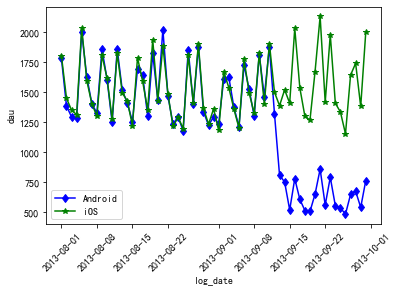

In [13]:
plt.plot(x, y1, 'b-d', label='Android')
plt.plot(x, y2, 'g-*', label='iOS')
plt.xticks(rotation=45)
plt.xlabel("log_date")
plt.ylabel("dau")
plt.legend()
plt.show()